In [2]:
# Jupyter Notebook 설정 : 모든 결과 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
# DeprecationWarning / FutureWarning(차후 버전에서 없어질 기능이니 미리 경고하는 것) 끄기
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# matplotlib에서 한글 사용 설정
from matplotlib import font_manager, rc
import matplotlib as mpl
import platform

mpl.rcParams['axes.unicode_minus'] = False

system = platform.system()
if system == "Windows":
    font_path = "C:/Windows/Fonts/malgun.ttf"
elif system == "Darwin": # Mac OS
    font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
elif system == "Linux":
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
else:
    font_path = None

if font_path:
    font = font_manager.FontProperties(fname=font_path).get_name()
    mpl.rcParams['font.family'] = font
else:
    print("폰트 경로를 확인해주세요.")

In [5]:
# plt.show() 동작 방법 변경 설정 (window >> jupyter notebook)
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [7]:
df_school=pd.read_csv('학교data/학교기본정보 (2).csv', encoding='utf-8')
df_school.head()

,시도교육청코드,시도교육청명,행정표준코드,학교명,영문학교명,학교종류명,시도명,관할조직명,설립명,도로명우편번호,...,팩스번호,고등학교구분명,산업체특별학급존재여부,고등학교일반전문구분명,특수목적고등학교계열명,입시전후기구분명,주야구분명,설립일자,개교기념일,수정일자
0,B10,서울특별시교육청,7010057,가락고등학교,Garak High School,고등학교,서울특별시,서울특별시교육청,공립,5678,...,02-421-9669,일반고,N,일반계,NaN,후기,주간,19881223,19890428,20230615
1,B10,서울특별시교육청,7130165,가락중학교,Karak Middle School,중학교,서울특별시,서울특별시강동송파교육지원청,공립,5673,...,02-2143-3119,,N,일반계,NaN,전기,주간,19860129,19860506,20230615
2,B10,서울특별시교육청,7041164,가산중학교,Gasan Middle School,중학교,서울특별시,서울특별시남부교육지원청,공립,8584,...,02-892-8477,,N,일반계,NaN,전기,주간,19700810,19710303,20230615
3,B10,서울특별시교육청,7130166,가원중학교,Gawon Middle School,중학교,서울특별시,서울특별시강동송파교육지원청,공립,5831,...,02-443-5825,,N,일반계,NaN,전기,주간,19881224,19881224,20230615
4,B10,서울특별시교육청,7011169,가재울고등학교,Gajaeul High School,고등학교,서울특별시,서울특별시교육청,공립,3709,...,02-307-6605,일반고,N,일반계,NaN,후기,주간,20130301,20130501,20230615


In [8]:
df_price=pd.read_csv('학교data/서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')
df_price.head()

C:\Users\User\AppData\Local\Temp\ipykernel_25772\4024006403.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_price=pd.read_csv('학교data/서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2025,11320,도봉구,10600,방학동,1.0,대지,638.0,10.0,한신빌라(638-10),...,14800,37.66,16.00,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구
1,2025,11380,은평구,10800,역촌동,NaN,NaN,NaN,NaN,NaN,...,39620,74.08,182.00,NaN,NaN,NaN,1972.0,단독다가구,직거래,NaN
2,2025,11500,강서구,10200,등촌동,1.0,대지,628.0,13.0,현대프린스텔,...,10300,26.16,35.71,6.0,NaN,NaN,1999.0,오피스텔,중개거래,서울 강서구
3,2025,11620,관악구,10200,신림동,1.0,대지,1639.0,51.0,푸리마타운,...,12700,18.70,26.16,8.0,NaN,NaN,2014.0,오피스텔,중개거래,서울 관악구
4,2025,11530,구로구,10600,고척동,1.0,대지,339.0,0.0,고척파크푸르지오,...,84000,59.89,0.00,9.0,NaN,NaN,2009.0,아파트,중개거래,"서울 구로구, 서울 양천구"


In [9]:
df_price["단위면적당가격"] = df_price["물건금액(만원)"]/df_price["건물면적(㎡)"]
df_price.head()


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,단위면적당가격
0,2025,11320,도봉구,10600,방학동,1.0,대지,638.0,10.0,한신빌라(638-10),...,37.66,16.00,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구,392.989910
1,2025,11380,은평구,10800,역촌동,NaN,NaN,NaN,NaN,NaN,...,74.08,182.00,NaN,NaN,NaN,1972.0,단독다가구,직거래,NaN,534.827214
2,2025,11500,강서구,10200,등촌동,1.0,대지,628.0,13.0,현대프린스텔,...,26.16,35.71,6.0,NaN,NaN,1999.0,오피스텔,중개거래,서울 강서구,393.730887
3,2025,11620,관악구,10200,신림동,1.0,대지,1639.0,51.0,푸리마타운,...,18.70,26.16,8.0,NaN,NaN,2014.0,오피스텔,중개거래,서울 관악구,679.144385
4,2025,11530,구로구,10600,고척동,1.0,대지,339.0,0.0,고척파크푸르지오,...,59.89,0.00,9.0,NaN,NaN,2009.0,아파트,중개거래,"서울 구로구, 서울 양천구",1402.571381


In [10]:
top_price = df_price.sort_values(by="단위면적당가격", ascending = False)
top_price.head()
                                 

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,단위면적당가격
156802,2023,11170,용산구,13100,한남동,NaN,NaN,NaN,NaN,NaN,...,19.83,99.00,NaN,NaN,NaN,1937.0,단독다가구,중개거래,서울 용산구,9833.585477
161640,2023,11110,종로구,13600,인사동,NaN,NaN,NaN,NaN,NaN,...,49.59,100.51,NaN,NaN,20240220.0,1970.0,단독다가구,직거래,NaN,9687.840290
161815,2023,11110,종로구,13600,인사동,NaN,NaN,NaN,NaN,NaN,...,49.59,100.51,NaN,NaN,NaN,1970.0,단독다가구,직거래,NaN,9687.840290
149241,2023,11170,용산구,12800,한강로3가,NaN,NaN,NaN,NaN,NaN,...,33.09,83.60,NaN,NaN,NaN,1969.0,단독다가구,중개거래,서울 용산구,9670.595346
231874,2022,11680,강남구,10800,논현동,NaN,NaN,NaN,NaN,NaN,...,165.06,579.00,NaN,NaN,NaN,1988.0,단독다가구,중개거래,서울 강남구,9511.692718


<Figure size 1000x800 with 0 Axes>

<BarContainer object of 25 artists>

Text(0.5, 1.0, '서울시 구별 단위면적당 가격 (2022~2025)')

Text(0.5, 0, '단위면적당 가격')

Text(0, 0.5, '구')

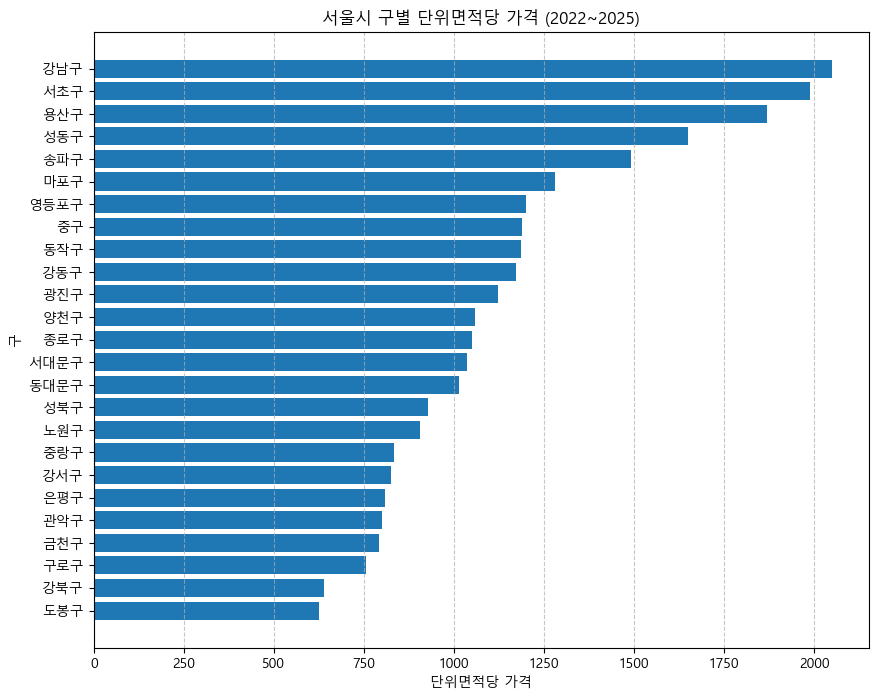

In [ ]:
#서울시 구별 단위면적당 가격 구하기
# matplotlib에서 한글 사용 설정
from matplotlib import font_manager, rc
import matplotlib as mpl
import platform

mpl.rcParams['axes.unicode_minus'] = False

system = platform.system()
if system == "Windows":
    font_path = "C:/Windows/Fonts/malgun.ttf"
elif system == "Darwin": # Mac OS
    font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
elif system == "Linux":
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
else:
    font_path = None

if font_path:
    font = font_manager.FontProperties(fname=font_path).get_name()
    mpl.rcParams['font.family'] = font
else:
    print("폰트 경로를 확인해주세요.")


import matplotlib.pyplot as plt

# 1. 구별로 묶어서 평균 구하기
# top_price 데이터를 '구' 기준으로 묶고, '단위면적당가격'의 평균(mean)을 계산합니다.
gu_mean = top_price.groupby('자치구명')['단위면적당가격'].mean()

# 2. 시각화를 위해 정렬하기  
gu_mean_sorted = gu_mean.sort_values(ascending=True)

# 3. 그래프 그리기
plt.figure(figsize=(10, 8))
plt.barh(gu_mean_sorted.index, gu_mean_sorted.values)

plt.title("서울시 구별 단위면적당 가격 (2022~2025)")
plt.xlabel("단위면적당 가격")
plt.ylabel("구")
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25772\4029740953.py:25: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_real_estate = pd.read_csv('학교data/서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')


<Figure size 1200x1000 with 0 Axes>

<BarContainer object of 25 artists>

Text(0.5, 1.0, '서울시 자치구별 부동산 거래량 (2022~2025)')

Text(0.5, 0, '거래 건수')

Text(0, 0.5, '자치구')

Text(3443, 0, ' 3,443건')

Text(3836, 1, ' 3,836건')

Text(5286, 2, ' 5,286건')

Text(7270, 3, ' 7,270건')

Text(7394, 4, ' 7,394건')

Text(7553, 5, ' 7,553건')

Text(7735, 6, ' 7,735건')

Text(7775, 7, ' 7,775건')

Text(7872, 8, ' 7,872건')

Text(8465, 9, ' 8,465건')

Text(8938, 10, ' 8,938건')

Text(9019, 11, ' 9,019건')

Text(9077, 12, ' 9,077건')

Text(9281, 13, ' 9,281건')

Text(9581, 14, ' 9,581건')

Text(9699, 15, ' 9,699건')

Text(9785, 16, ' 9,785건')

Text(10580, 17, ' 10,580건')

Text(10679, 18, ' 10,679건')

Text(11511, 19, ' 11,511건')

Text(12203, 20, ' 12,203건')

Text(12372, 21, ' 12,372건')

Text(13076, 22, ' 13,076건')

Text(14803, 23, ' 14,803건')

Text(18437, 24, ' 18,437건')

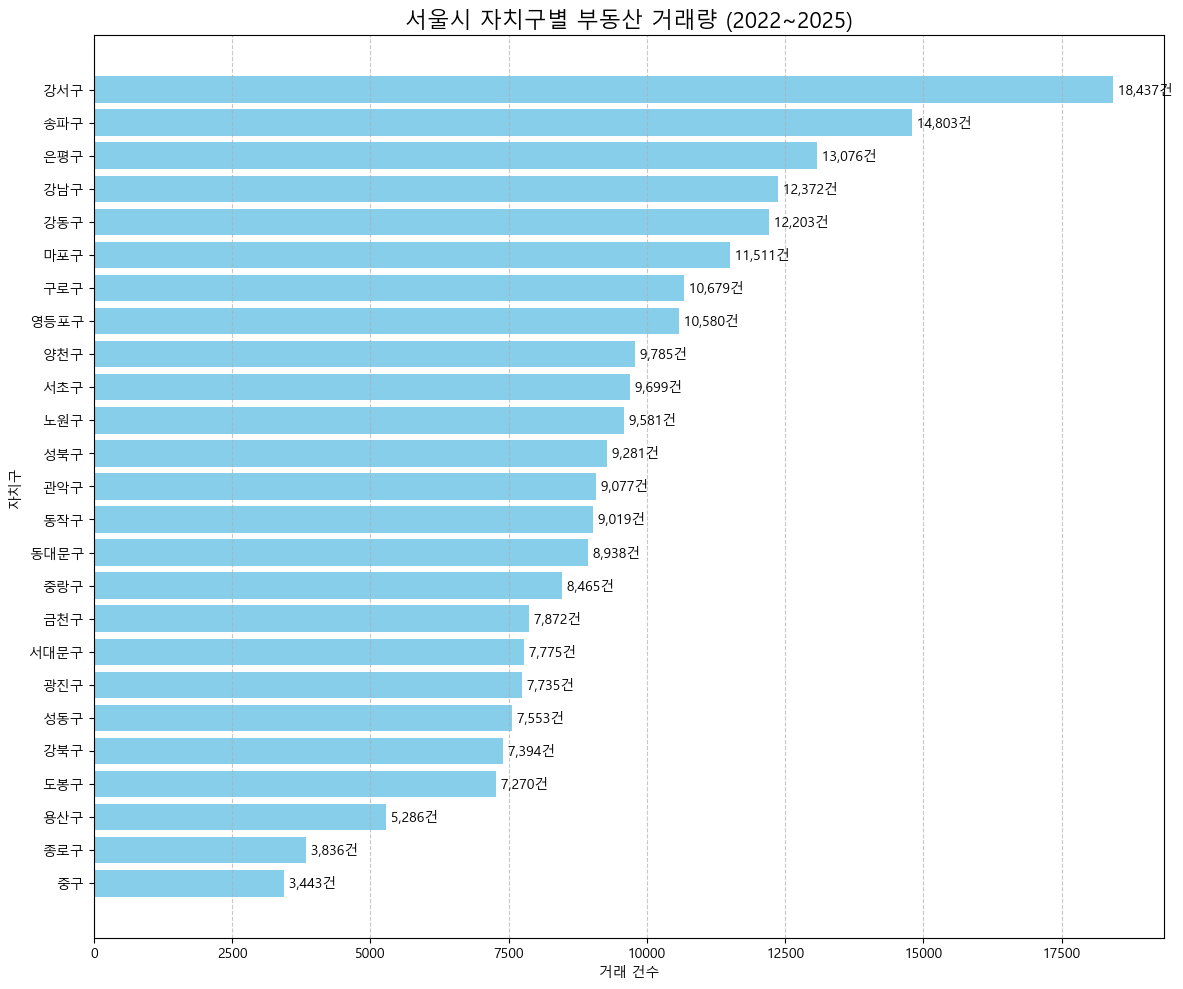

In [ ]:
#서울시 자치구별 부동산 거래량 구하기
# matplotlib에서 한글 사용 설정
from matplotlib import font_manager, rc
import matplotlib as mpl
import platform

mpl.rcParams['axes.unicode_minus'] = False

system = platform.system()
if system == "Windows":
    font_path = "C:/Windows/Fonts/malgun.ttf"
elif system == "Darwin": # Mac OS
    font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
elif system == "Linux":
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
else:
    font_path = None

if font_path:
    font = font_manager.FontProperties(fname=font_path).get_name()
    mpl.rcParams['font.family'] = font
else:
    print("폰트 경로를 확인해주세요.")

# 1. 데이터 불러오기
df_real_estate = pd.read_csv('학교data/서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')

# 2. 거래량 계산하기 (구별 데이터 개수 세기)
transaction_counts = df_real_estate['자치구명'].value_counts()

# 3. 정렬하기 
transaction_sorted = transaction_counts.sort_values(ascending=True)

# 4. 시각화
plt.figure(figsize=(12, 10))
plt.barh(transaction_sorted.index, transaction_sorted.values, color='skyblue')

plt.title('서울시 자치구별 부동산 거래량 (2022~2025)', fontsize=16)
plt.xlabel('거래 건수')
plt.ylabel('자치구')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 데이터 라벨(건수) 표시 (선택사항)
for i, v in enumerate(transaction_sorted.values):
    plt.text(v, i, f' {v:,}건', va='center')

plt.tight_layout()
plt.show()

===자치구별 학교 수 Top 5 ===
자치구명
노원구    100
송파구     96
강남구     85
강서구     83
은평구     68
Name: count, dtype: int64

===자치구별 부동산 거래량 Top 5 ===
자치구명
강서구    18437
송파구    14803
은평구    13076
강남구    12372
강동구    12203
Name: count, dtype: int64


<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='자치구명', ylabel='count'>

Text(0.5, 1.0, '서울시 자치구별 학교 수 분포')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '노원구'),
  Text(1, 0, '송파구'),
  Text(2, 0, '강남구'),
  Text(3, 0, '강서구'),
  Text(4, 0, '은평구'),
  Text(5, 0, '강동구'),
  Text(6, 0, '양천구'),
  Text(7, 0, '성북구'),
  Text(8, 0, '구로구'),
  Text(9, 0, '관악구'),
  Text(10, 0, '서초구'),
  Text(11, 0, '마포구'),
  Text(12, 0, '동작구'),
  Text(13, 0, '동대문구'),
  Text(14, 0, '중랑구'),
  Text(15, 0, '종로구'),
  Text(16, 0, '영등포구'),
  Text(17, 0, '도봉구'),
  Text(18, 0, '광진구'),
  Text(19, 0, '서대문구'),
  Text(20, 0, '성동구'),
  Text(21, 0, '용산구'),
  Text(22, 0, '강북구'),
  Text(23, 0, '금천구'),
  Text(24, 0, '중구')])

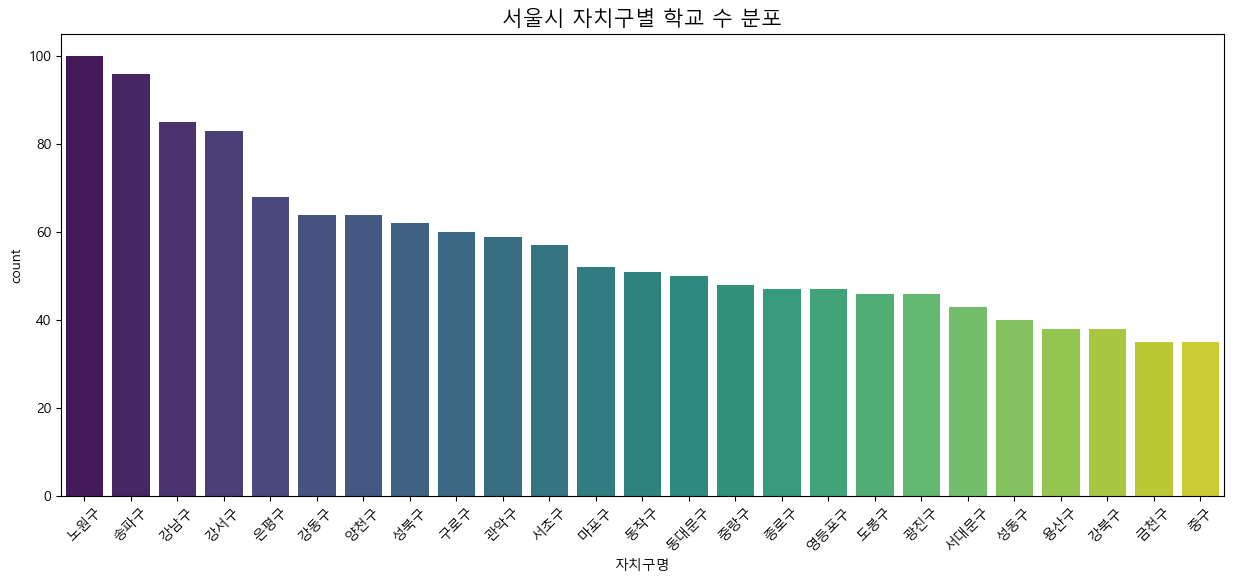

상관계수: 0.1021


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='학교수', ylabel='평균거래금액'>

Text(85.5, 175249.4274167475, '강남구')

Text(64.5, 74539.09800868639, '강동구')

Text(38.5, 36790.41371382202, '강북구')

Text(83.5, 41237.221077181755, '강서구')

Text(59.5, 48789.376776467994, '관악구')

Text(46.5, 74112.63684550744, '광진구')

Text(60.5, 43640.239348253584, '구로구')

Text(35.5, 37890.772738821135, '금천구')

Text(100.5, 55159.55860557353, '노원구')

Text(46.5, 38065.3371389271, '도봉구')

Text(50.5, 62288.45121951219, '동대문구')

Text(51.5, 78693.15589311454, '동작구')

Text(52.5, 79567.0406567631, '마포구')

Text(43.5, 64582.288360128616, '서대문구')

Text(57.5, 159972.46654294257, '서초구')

Text(40.5, 122804.97921355753, '성동구')

Text(62.5, 64624.18931149661, '성북구')

Text(96.5, 105114.59683847868, '송파구')

Text(64.5, 72124.8098109351, '양천구')

Text(47.5, 76448.34574669188, '영등포구')

Text(38.5, 159554.11937192583, '용산구')

Text(68.5, 46061.35201896604, '은평구')

Text(47.5, 70475.61652763296, '종로구')

Text(35.5, 75016.6328783038, '중구')

Text(48.5, 45769.85103366805, '중랑구')

Text(0.5, 1.0, '서울시 자치구별 학교 수 vs 부동산 가격 (상관계수: 0.10)')

Text(0.5, 0, '학교 수 (개)')

Text(0, 0.5, '평균 거래 금액 (만원)')

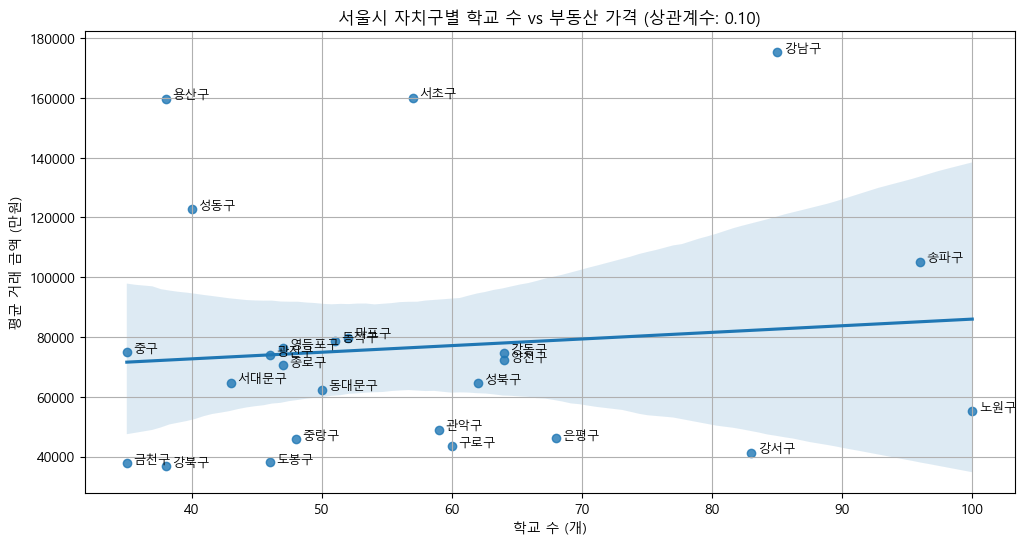

In [ ]:
#서울시 자치구별 학교수 vs 부동산 가격 

# 1. 학교 데이터 전처리: 주소에서 '구' 이름 뽑아내기
df_school['자치구명'] = df_school['도로명주소'].str.split(' ').str[1]
# 자치구별 학교 개수 세기
school_count = df_school.groupby('자치구명')['학교명'].count().reset_index()
school_count.columns = ['자치구명', '학교수']

# 2. 부동산 데이터 전처리: 자치구별 평균 가격 구하기
price_mean = df_price.groupby('자치구명')['물건금액(만원)'].mean().reset_index()
price_mean.columns = ['자치구명', '평균거래금액']

# 3. 두 데이터 합치기 
merged_df = pd.merge(school_count, price_mean, on='자치구명')


print("===자치구별 학교 수 Top 5 ===")
# value_counts()는 개수를 세어 내림차순으로 보여줍니다.
school_counts = df_school['자치구명'].value_counts()
print(school_counts.head())

print("\n===자치구별 부동산 거래량 Top 5 ===")
price_counts = df_price['자치구명'].value_counts()
print(price_counts.head())

# 4. [시각화] 자치구별 학교 수 막대그래프
plt.figure(figsize=(15, 6))
# countplot은 자동으로 개수(count)를 세어 그래프를 그려줍니다.
sns.countplot(data=df_school, x='자치구명', order=school_counts.index, palette='viridis')
plt.title('서울시 자치구별 학교 수 분포', fontsize=15)
plt.xticks(rotation=45)
plt.show()


# 5. 상관계수 계산
corr = merged_df['학교수'].corr(merged_df['평균거래금액'])
print(f"상관계수: {correlation:.4f}")

# 6. 시각화 (산점도 그리기)
plt.figure(figsize=(12, 6))
# 산점도와 회귀선(추세선) 함께 그리기
sns.regplot(x='학교수', y='평균거래금액', data=merged_df)

# 각 점에 구 이름 표시하기
for i in range(merged_df.shape[0]):
    plt.text(merged_df.학교수[i]+0.5, merged_df.평균거래금액[i], 
             merged_df.자치구명[i], fontsize=9)

plt.title(f'서울시 자치구별 학교 수 vs 부동산 가격 (상관계수: {corr:.2f})')
plt.xlabel('학교 수 (개)')
plt.ylabel('평균 거래 금액 (만원)')
plt.grid(True)
plt.show()

In [ ]:
'''주요 인사이트
1. 부동산 가격 결정의 핵심은 "단순 학교 수(양)"가 아님 데이터는 학교라는 인프라의 "물리적인 개수"가 집값을 견인하지 않는다는 것을 보여줍니다. 노원구(학교 많음, 가격 낮음)와 용산구(학교 적음, 가격 높음)의 대조적인 모습은, 집값 형성에 있어 교육 시설의 "양"보다는 다른 요인이 훨씬 크게 작용함을 시사합니다.

2. "입지적 가치"가 교육 인프라를 압도함 용산구, 성동구, 서초구 등의 높은 가격은 학교 수보다는 "한강 변", "업무 지구 접근성(직주근접)", "교통 편의성" 등 입지적 프리미엄이 더 크게 작용한 결과로 해석됩니다. 특히 용산구는 학교 수가 강북구(38.5개, 약 3.6억)와 동일하지만, 가격은 약 4.4배나 높습니다.

3. 교육 프리미엄은 "양"이 아닌 "질(학군)"에 집중됨 강남구가 학교 수도 많고 가격도 비싼 이유는 단순히 학교가 많아서라기보다, 소위 명문 학군과 학원가라는 "교육의 질적 프리미엄"이 입지 가치와 결합되었기 때문으로 보입니다. 반면 노원구는 학교는 많지만 강남만큼의 고가 시장을 형성하지 못하고 있습니다.'''

'''이 데이터 분석의 결론은 다음과 같습니다.

"서울시 부동산 가격은 학교의 개수와 무관하게 움직인다."

부동산 가치를 판단하거나 정책을 수립할 때, 단순히 학교를 많이 짓는 공급 위주의 접근은 가격 상승이나 지역 가치 제고에 큰 영향을 미치지 못할 가능성이 큽니다.

집값은 학교의 개수보다 "일자리 접근성", "한강 및 녹지 프리미엄", 그리고 "교육 환경의 질적 수준(명문 학군)" 등 복합적인 요인에 의해 결정된다는 점이 이번 데이터로 확인되었습니다.'''

In [ ]:
#서울시 자치구별 학원수 vs 부동산 가격 

import pandas as pd
df_academy = pd.read_csv('학교data/서울시 학원 교습소정보.csv', encoding='cp949')
df_academy.head()

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,인당수강료내용,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시
0,동대문구,학원,1000000064,대성회계실무학원,서울특별시 동대문구 왕산로 225,", 5층2호?5층6호?5층7호 중 일부(B호) (청량리동, 미주상가)",종합(대),NaN,"전산회계,컴퓨터(정보처리,통신기기,인터넷,소프트웨어)",NaN,...,NaN,Y,N,2490,개원,19681227,NaN,99991231.0,19681227,20231018
1,동대문구,학원,1000000083,국제전자과학학원,서울특별시 동대문구 고산자로36길 3,", 3층 일부 (제기동, 경동시장)",직업기술,산업기반기술,"전자,",전자,...,NaN,Y,N,2571,개원,19680210,NaN,99991231.0,19680210,20231018
2,동대문구,학원,1000000147,조이앤플레이음악학원,서울특별시 동대문구 이문로 38,", 3층 301호 (휘경동, 민족통일빌딩)",기예(대),예능(중),NaN,음악,...,NaN,Y,N,2445,개원,19720630,NaN,99991231.0,19720630,20250518
3,동대문구,학원,1000000151,한독자동차정비학원,서울특별시 동대문구 왕산로 31,", 2층,3층 (신설동)",직업기술,산업기반기술,NaN,자동차,...,NaN,Y,N,130811,개원,19720501,NaN,99991231.0,19720501,20231018
4,중랑구,학원,1000000293,예맥보습학원,서울특별시 중랑구 동일로151길 30,2층 (묵동),입시.검정 및 보습,보통교과,보습,보습,...,NaN,Y,N,2008,개원,19881102,NaN,99991231.0,19881102,20250330


In [ ]:
df_academy.count()


행정구역명         25390
학원/교습소        25417
학원지정번호        25417
학원명           25417
도로명주소         25414
도로명상세주소       25387
분야명           25416
교습계열명         21978
교습과정목록명       18684
교습과정명         21978
정원합계          25417
일시수용능력인원합계    25417
인당수강료내용        6267
수강료공개여부       25417
기숙사학원여부       21838
도로명우편번호       25417
등록상태명         25417
등록일자          25417
휴원시작일자          349
휴원종료일자        20578
개설일자          25417
적재일시          25417
dtype: int64

In [ ]:
unique_list = df_academy['교습계열명'].unique().tolist()
unique_list

[nan,
 '산업기반기술',
 '예능(중)',
 '보통교과',
 '기타(중)',
 '외국어',
 '기예(중)',
 '컴퓨터',
 '독서',
 '인문사회(중)',
 '국제',
 '간호보조기술',
 '문화관광',
 '산업응용기술',
 '산업서비스',
 '진학지도',
 '일반서비스',
 '경영?사무관리',
 '특수교육(중)',
 '정보']

Text(0.5, 1.0, '강남구 교습계열명 분포')

Text(0.5, 1.0, '서초구 교습계열명 분포')

Text(0.5, 1.0, '용산구 교습계열명 분포')

Text(0.5, 1.0, '성동구 교습계열명 분포')

Text(0.5, 1.0, '송파구 교습계열명 분포')

Text(0.5, 1.0, '마포구 교습계열명 분포')

Text(0.5, 1.0, '구로구 교습계열명 분포')

Text(0.5, 1.0, '강북구 교습계열명 분포')

Text(0.5, 1.0, '도봉구 교습계열명 분포')

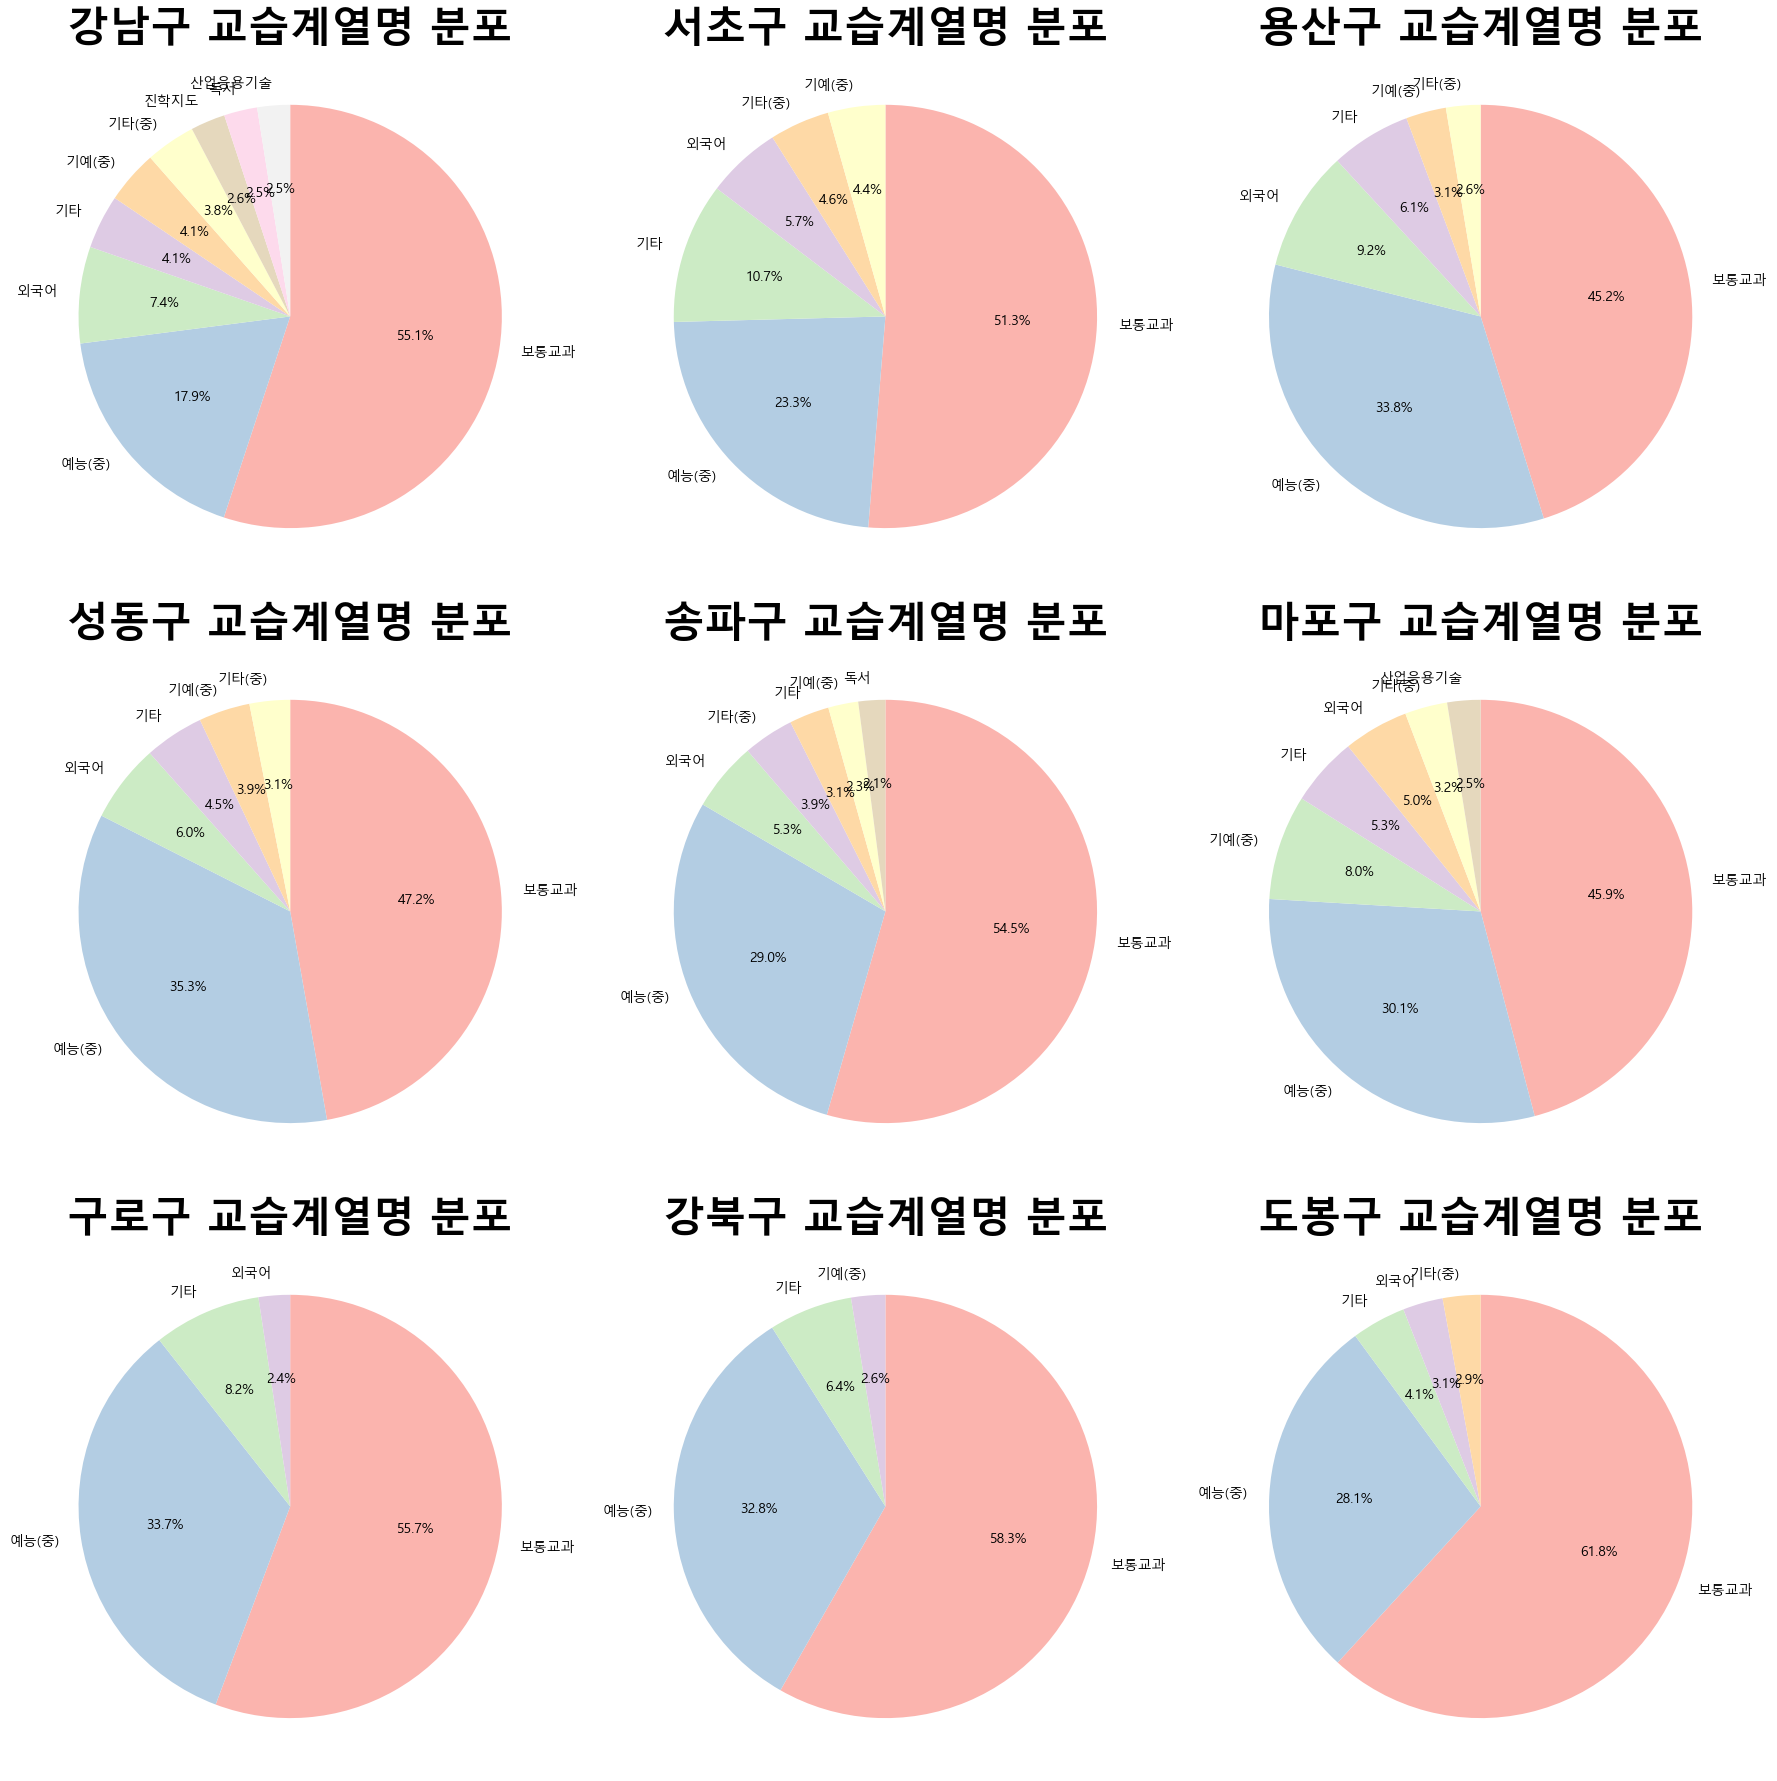

In [ ]:
#자치구별 학원 비율 
import pandas as pd
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False

system = platform.system()
if system == "Windows":
    font_path = "C:/Windows/Fonts/malgun.ttf"
elif system == "Darwin": # Mac OS
    font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
elif system == "Linux":
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
else:
    font_path = None

if font_path:
    font = font_manager.FontProperties(fname=font_path).get_name()
    mpl.rcParams['font.family'] = font
else:
    print("폰트 경로를 확인해주세요.")

# 2. 데이터 불러오기
df_academy = pd.read_csv('학교data/서울시 학원 교습소정보.csv',encoding='cp949' )

# 3. 분석할 구 리스트 설정 (총 9개)
target_districts = [
    '강남구', '서초구', '용산구', '성동구', '송파구', '마포구', 
    '구로구', '강북구', '도봉구'
]

# 4. 데이터 전처리
# (1) 원하는 구만 남기기
# (2) '교습계열명'이 비어있는 데이터(NaN) 제거
df_filtered = df_academy[df_academy['행정구역명'].isin(target_districts)].copy()
df_filtered = df_filtered.dropna(subset=['교습계열명'])

# 5. 시각화 데이터 준비 함수 
def get_pie_data(df, district, col='교습계열명', threshold=0.02):
    # 해당 구의 비율 데이터 계산
    d_data = df[df['행정구역명'] == district][col].value_counts(normalize=True)
    
    # 설정한 기준(2%)보다 큰 것만 남기고, 나머지는 '기타'로 합침
    main = d_data[d_data >= threshold]
    other_sum = d_data[d_data < threshold].sum()
    
    if other_sum > 0:
        main['기타'] = other_sum
        
    return main

# 6. 그래프 그리기 
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

for i, district in enumerate(target_districts):
    
    pie_data = get_pie_data(df_filtered, district)
    
    pie_data = pie_data.sort_values(ascending=False)
    
    wedges, texts, autotexts = axes[i].pie(
        pie_data, 
        labels=pie_data.index, 
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        colors=plt.cm.Pastel1.colors
    )
    
    axes[i].set_title(f'{district} 교습계열명 분포', fontsize=30, fontweight='bold')

plt.tight_layout()
plt.show() 

In [ ]:
'''주요 인사이트
1. 진학지도(입시 컨설팅): 강남구(75개)>서초구(15개)>나머지 7개구 합계(8개)
    강남구에만 서울 9개 구 전체 진학지도의 학원의 약 76%가 집중되어 있음. 
    => 고소득층이 선호하는 '입시 전략' 서비스는 강남구 독점 체제
2. 예능(음악/미술/체육) : 강남구(17.9%)< 집값이 상대적으로 낮은 지역인 성동구(35.3%), 용산구(33.8%),구로구(33.7%) 비중이 높다.
3. 보통교과(학교내신, 수능대비): 강남구(55.1%)에 비해 도봉구(61.8%)와 강북구(58.3%)가 학교내신을 대비하는 학원 비중이 높음 
4. 기예(기예/문화): 마포구(8.0%)가 타 자치구 대비 월등히 높음. 홍대/합정 등 문화 예술 상권과 연계된 성인 대상 취미/실용 학원이나, 방송/연예 관련 학원이 많기 때문으로 추정


=== 자치구별 학원 수 Top 5 ===
자치구명
강남구    3439
양천구    2096
송파구    1948
서초구    1833
노원구    1423
Name: count, dtype: int64

=== 자치구별 부동산 거래량 Top 5 ===
자치구명
강서구    18437
송파구    14803
은평구    13076
강남구    12372
강동구    12203
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_25772\3431432192.py:26: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_price = pd.read_csv('학교data/서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')


<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='자치구명', ylabel='count'>

Text(0.5, 1.0, '서울시 자치구별 학원 수 분포')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, '강남구'),
  Text(1, 0, '양천구'),
  Text(2, 0, '송파구'),
  Text(3, 0, '서초구'),
  Text(4, 0, '노원구'),
  Text(5, 0, '강동구'),
  Text(6, 0, '강서구'),
  Text(7, 0, '마포구'),
  Text(8, 0, '은평구'),
  Text(9, 0, '성북구'),
  Text(10, 0, '동작구'),
  Text(11, 0, '영등포구'),
  Text(12, 0, '구로구'),
  Text(13, 0, '광진구'),
  Text(14, 0, '서대문구'),
  Text(15, 0, '관악구'),
  Text(16, 0, '동대문구'),
  Text(17, 0, '도봉구'),
  Text(18, 0, '성동구'),
  Text(19, 0, '중랑구'),
  Text(20, 0, '강북구'),
  Text(21, 0, '금천구'),
  Text(22, 0, '종로구'),
  Text(23, 0, '용산구'),
  Text(24, 0, '중구'),
  Text(25, 0, '토정로17길')])

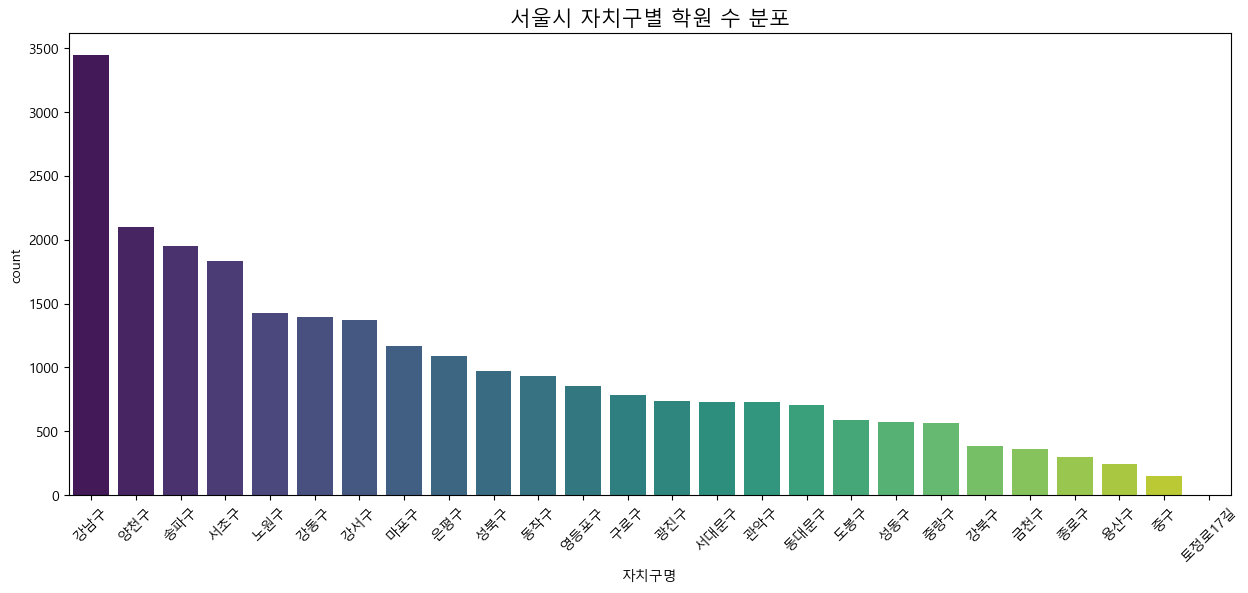


최종 상관계수: 0.4834


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='학원수', ylabel='평균거래금액'>

Text(3444, 175249.4274167475, '강남구')

Text(1397, 74539.09800868639, '강동구')

Text(390, 36790.41371382202, '강북구')

Text(1377, 41237.221077181755, '강서구')

Text(739, 48789.376776467994, '관악구')

Text(741, 74112.63684550744, '광진구')

Text(786, 43640.239348253584, '구로구')

Text(370, 37890.772738821135, '금천구')

Text(1428, 55159.55860557353, '노원구')

Text(597, 38065.3371389271, '도봉구')

Text(708, 62288.45121951219, '동대문구')

Text(941, 78693.15589311454, '동작구')

Text(1171, 79567.0406567631, '마포구')

Text(739, 64582.288360128616, '서대문구')

Text(1838, 159972.46654294257, '서초구')

Text(581, 122804.97921355753, '성동구')

Text(977, 64624.18931149661, '성북구')

Text(1953, 105114.59683847868, '송파구')

Text(2101, 72124.8098109351, '양천구')

Text(863, 76448.34574669188, '영등포구')

Text(253, 159554.11937192583, '용산구')

Text(1093, 46061.35201896604, '은평구')

Text(308, 70475.61652763296, '종로구')

Text(160, 75016.6328783038, '중구')

Text(570, 45769.85103366805, '중랑구')

Text(0.5, 1.0, '학원 수와 아파트 가격의 관계 (상관계수: 0.48)')

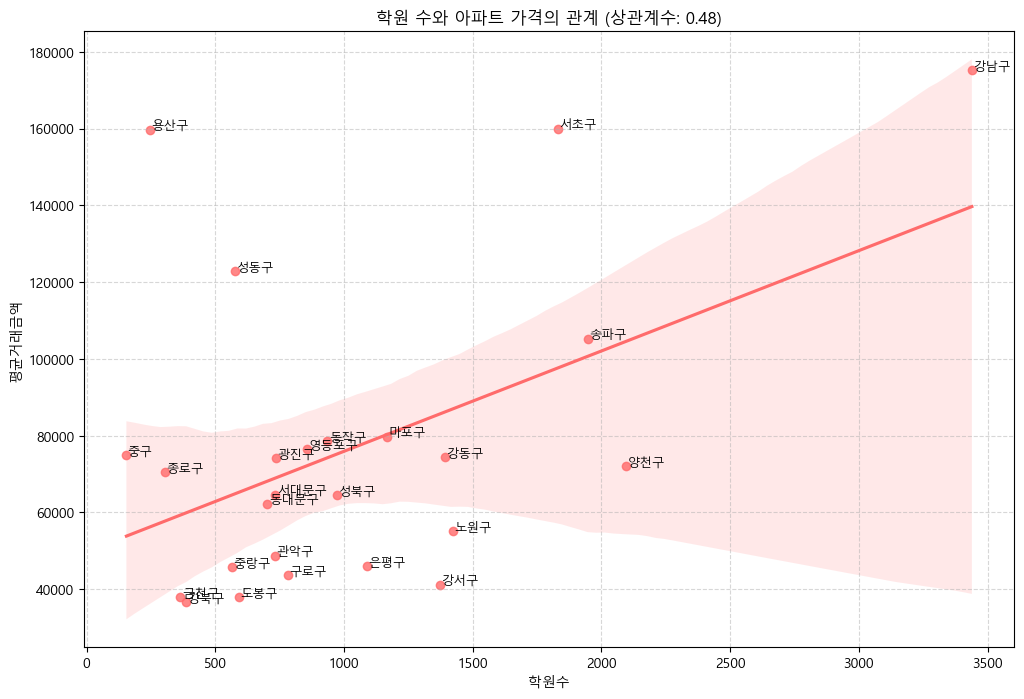

In [ ]:
#서울시 자치구별 학원수 vs 부동산 가격 
# Jupyter Notebook 설정 : 모든 결과 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# plt.show() 동작 방법 변경 설정 (window >> jupyter notebook)
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. 한글 폰트 설정
# ---------------------------------------------------------
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우는 Malgun Gothic, 맥은 AppleGothic
plt.rcParams['axes.unicode_minus'] = False

# ---------------------------------------------------------
# 2. 데이터 불러오기
# ---------------------------------------------------------
try:
    df_academy = pd.read_csv('학교data/서울시 학원 교습소정보.csv', encoding='utf-8')
    df_price = pd.read_csv('학교data/서울시 부동산 실거래가 정보(2022~2025).csv', encoding='utf-8')
except UnicodeDecodeError:
    df_academy = pd.read_csv('학교data/서울시 학원 교습소정보.csv', encoding='cp949')
    df_price = pd.read_csv('학교data/서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')

# ---------------------------------------------------------
# 3. 데이터 전처리
# ---------------------------------------------------------
# (1) 학원 데이터: 주소에서 '구' 추출
df_academy = df_academy.dropna(subset=['도로명주소'])
df_academy['자치구명'] = df_academy['도로명주소'].str.split(' ').str[1]

# ---------------------------------------------------------
# (2) 데이터 분포 확인하기 
# ---------------------------------------------------------
print("=== 자치구별 학원 수 Top 5 ===")
# value_counts()는 개수를 세어 내림차순으로 보여줍니다.
academy_counts = df_academy['자치구명'].value_counts()
print(academy_counts.head())

print("\n=== 자치구별 부동산 거래량 Top 5 ===")
price_counts = df_price['자치구명'].value_counts()
print(price_counts.head())

# 4. [시각화] 자치구별 학원 수 막대그래프
plt.figure(figsize=(15, 6))
# countplot은 자동으로 개수(count)를 세어 그래프를 그려줍니다.
sns.countplot(data=df_academy, x='자치구명', order=academy_counts.index, palette='viridis')
plt.title('서울시 자치구별 학원 수 분포', fontsize=15)
plt.xticks(rotation=45)
plt.show()

# ---------------------------------------------------------
# 5. 데이터 집계 (Groupby + Count/Mean)
# ---------------------------------------------------------
# 자치구별 학원 '개수(count)' 집계
df_academy_count = df_academy.groupby('자치구명')['학원명'].count().reset_index()
df_academy_count.columns = ['자치구명', '학원수']

# 자치구별 부동산 '평균(mean)' 집계
df_price_mean = df_price.groupby('자치구명')['물건금액(만원)'].mean().reset_index()
df_price_mean.columns = ['자치구명', '평균거래금액']

# ---------------------------------------------------------
# 6. 상관분석 및 시각화
# ---------------------------------------------------------
merged_df = pd.merge(df_academy_count, df_price_mean, on='자치구명')

# 상관계수 계산
corr = merged_df['학원수'].corr(merged_df['평균거래금액'])
print(f"\n최종 상관계수: {corr:.4f}")

# 산점도 그리기
plt.figure(figsize=(12, 8))
sns.regplot(x='학원수', y='평균거래금액', data=merged_df, color='#FF6B6B')

for i in range(merged_df.shape[0]):
    plt.text(merged_df.학원수[i]+5, merged_df.평균거래금액[i], merged_df.자치구명[i], fontsize=9)

plt.title(f'학원 수와 아파트 가격의 관계 (상관계수: {corr:.2f})')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [42]:
'''강남구: 3439개 > 양천구 (목동 학군): 2096개 > 송파구: 1948개 > 서초구: 1833개 > 노원구(중계동 학군): 1423개
학원수와  상관관계가  0.48로 낮은 편이다.'''

'강남구: 3439개 > 양천구 (목동 학군): 2096개 > 송파구: 1948개 > 서초구: 1833개 > 노원구(중계동 학군): 1423개\n학원수와  상관관계가  0.48로 낮은 편이다.'

C:\Users\User\AppData\Local\Temp\ipykernel_25772\1341658312.py:26: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_price = pd.read_csv(filename_price, encoding='cp949')


<Figure size 1400x1000 with 0 Axes>

Text(1918, 6763.321619382787, '강남구')

Text(777, 3873.3458751874077, '강동구')

Text(214, 2111.521652401385, '강북구')

Text(765, 2720.4823024420016, '강서구')

Text(357, 2644.8001624647736, '관악구')

Text(401, 3701.014677406686, '광진구')

Text(425, 2495.6192016781697, '구로구')

Text(176, 2615.382454479849, '금천구')

Text(888, 2987.9748927783035, '노원구')

Text(372, 2062.4171327350214, '도봉구')

Text(384, 3342.270478433351, '동대문구')

Text(527, 3918.0802337052855, '동작구')

Text(531, 4226.530435966823, '마포구')

Text(394, 3424.183553466709, '서대문구')

Text(943, 6564.597831956814, '서초구')

Text(272, 5448.195104424596, '성동구')

Text(565, 3063.5712438730684, '성북구')

Text(1040, 4922.08373770536, '송파구')

Text(1304, 3494.0600124795856, '양천구')

Text(406, 3960.70107552442, '영등포구')

Text(138, 6171.353719916297, '용산구')

Text(618, 2671.071802664594, '은평구')

Text(152, 3465.936481001568, '종로구')

Text(82, 3920.0330546415257, '중구')

Text(286, 2754.9037261298454, '중랑구')

Text(1717.2, 6898.588051770443, '1. 부+교육의 정점\n(강남/서초/송파)')

Text(172, 6898.588051770443, '2. 삶의 질/직주근접\n(용산/성동)')

Text(1717.2, 2562.4171327350214, '4. 가성비 실속 학군\n(양천/노원)')

Text(272, 2562.4171327350214, '3. 잠재 성장 지역')

Text(0.5, 1.0, '서울시 자치구 유형 분석: 입시학원 수 vs 아파트 평당가격')

Text(0.5, 0, '입시·보습·국제 학원 수 (개)')

Text(0, 0.5, '평당 아파트 가격 (만원/3.3㎡)')

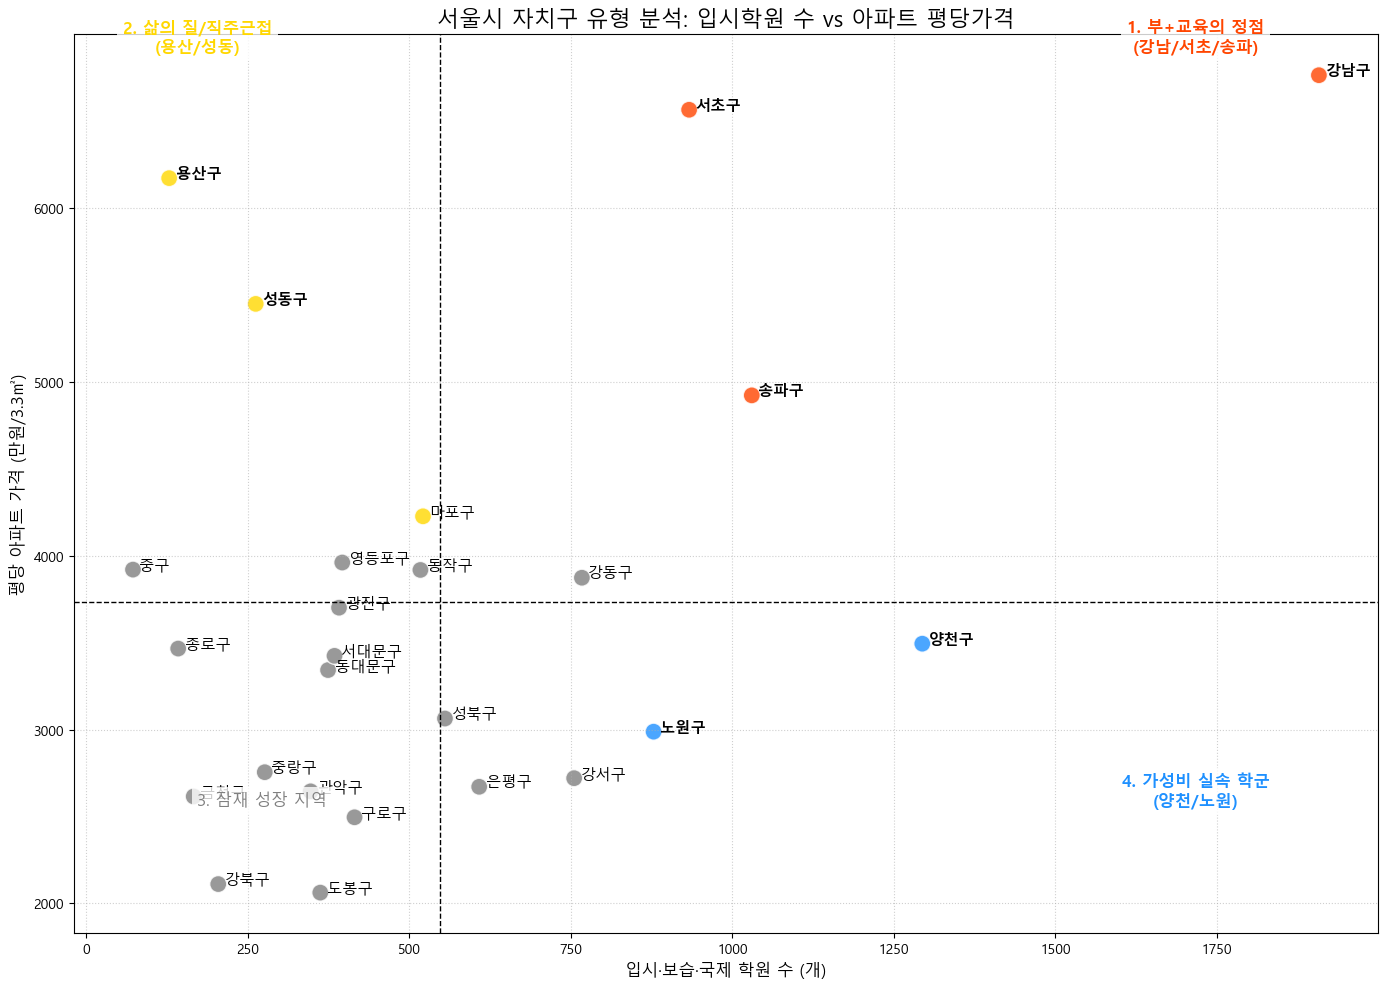

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 1. 폰트 설정 (한글 깨짐 방지)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic') # 리눅스/코랩 환경
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 로드
# (실제 파일 경로에 맞게 파일명을 수정해주세요)
filename_academy = '서울시 학원 교습소정보.csv'
filename_price = '서울시 부동산 실거래가 정보(2022~2025).csv'

try:
    df_academy = pd.read_csv(filename_academy, encoding='utf-8')
    df_price = pd.read_csv(filename_price, encoding='utf-8')
except UnicodeDecodeError:
    # 한글 윈도우에서 저장된 파일일 경우 cp949 인코딩 사용
    df_academy = pd.read_csv(filename_academy, encoding='cp949')
    df_price = pd.read_csv(filename_price, encoding='cp949')

# ---------------------------------------------------------
# 3. 데이터 전처리: [학원 데이터]
# ---------------------------------------------------------
# (1) 자치구명 추출 (주소에서 '구'만 분리)
df_academy = df_academy.dropna(subset=['도로명주소'])
df_academy['자치구명'] = df_academy['도로명주소'].str.split(' ').str[1]

# (2) '핵심 입시 학원'만 필터링 (가장 중요한 부분!)
# 일반 취미/예체능을 제외하고 입시와 직결된 항목만 선정
core_categories = ['보통교과', '외국어', '진학지도', '국제', '인문사회(중)', '종합(대)']
df_academy['is_core'] = df_academy['교습계열명'].isin(core_categories)

# (3) 자치구별 학원 수 집계
df_core_count = df_academy[df_academy['is_core']].groupby('자치구명').size().reset_index(name='입시학원수')

# ---------------------------------------------------------
# 4. 데이터 전처리: [부동산 데이터]
# ---------------------------------------------------------
# (1) 평당 가격(3.3㎡당) 계산: 단순 매매가가 아닌 '단가'로 비교해야 정확함
df_price = df_price.dropna(subset=['자치구명', '물건금액(만원)', '건물면적(㎡)'])
df_price['평당가격'] = (df_price['물건금액(만원)'] / df_price['건물면적(㎡)']) * 3.3

# (2) 자치구별 평균 평당가 집계
df_price_mean = df_price.groupby('자치구명')['평당가격'].mean().reset_index()

# 5. 데이터 병합
merged_df = pd.merge(df_price_mean, df_core_count, on='자치구명').fillna(0)

# ---------------------------------------------------------
# 6. 시각화: 4분면 매트릭스 그래프 그리기
# ---------------------------------------------------------
plt.figure(figsize=(14, 10))

# (1) 4분면 기준선 설정 (서울시 평균값)
mean_x = merged_df['입시학원수'].mean()
mean_y = merged_df['평당가격'].mean()

# (2) 그룹별 색상 지정 (인사이트 반영)
colors = []
for gu in merged_df['자치구명']:
    if gu in ['강남구', '서초구', '송파구']:
        colors.append('#FF4500')  # 강남3구 (Red-Orange) -> 부+교육
    elif gu in ['용산구', '성동구', '마포구']:
        colors.append('#FFD700')  # 마용성 (Gold) -> 삶의 질(한강 등)
    elif gu in ['양천구', '노원구']:
        colors.append('#1E90FF')  # 학군지 (Blue) -> 가성비 교육
    else:
        colors.append('gray')     # 기타

# (3) 산점도 그리기
plt.scatter(merged_df['입시학원수'], merged_df['평당가격'], c=colors, s=150, alpha=0.8, edgecolor='white')

# (4) 4분면 기준선 그리기
plt.axvline(x=mean_x, color='black', linestyle='--', linewidth=1)
plt.axhline(y=mean_y, color='black', linestyle='--', linewidth=1)

# (5) 자치구 이름 라벨링
for i, row in merged_df.iterrows():
    # 주요 지역만 굵게 표시
    weight = 'bold' if row['자치구명'] in ['강남구','서초구','송파구','용산구','성동구','양천구','노원구'] else 'normal'
    # 글자가 점을 가리지 않게 위치 미세 조정 (+10, +0)
    plt.text(row['입시학원수']+10, row['평당가격'], row['자치구명'], fontsize=11, fontweight=weight)

# (6) 4분면 의미 텍스트 박스 추가
# 1사분면 (우상단)
plt.text(merged_df['입시학원수'].max()*0.9, merged_df['평당가격'].max()*1.02, 
         "1. 부+교육의 정점\n(강남/서초/송파)", ha='center', fontsize=12, fontweight='bold', color='#FF4500', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# 2사분면 (좌상단)
plt.text(merged_df['입시학원수'].min()+100, merged_df['평당가격'].max()*1.02, 
         "2. 삶의 질/직주근접\n(용산/성동)", ha='center', fontsize=12, fontweight='bold', color='#FFD700',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# 4사분면 (우하단)
plt.text(merged_df['입시학원수'].max()*0.9, merged_df['평당가격'].min()+500, 
         "4. 가성비 실속 학군\n(양천/노원)", ha='center', fontsize=12, fontweight='bold', color='#1E90FF',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# 3사분면 (좌하단)
plt.text(merged_df['입시학원수'].min()+200, merged_df['평당가격'].min()+500, 
         "3. 잠재 성장 지역", ha='center', fontsize=12, color='gray',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.title('서울시 자치구 유형 분석: 입시학원 수 vs 아파트 평당가격', fontsize=16)
plt.xlabel('입시·보습·국제 학원 수 (개)', fontsize=12)
plt.ylabel('평당 아파트 가격 (만원/3.3㎡)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25772\3880134685.py:8: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_price = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')


<Figure size 1200x800 with 0 Axes>

Text(1913, 175249.4274167475, '강남구')

Text(772, 74539.09800868639, '강동구')

Text(209, 36790.41371382202, '강북구')

Text(760, 41237.221077181755, '강서구')

Text(352, 48789.376776467994, '관악구')

Text(396, 74112.63684550744, '광진구')

Text(420, 43640.239348253584, '구로구')

Text(171, 37890.772738821135, '금천구')

Text(883, 55159.55860557353, '노원구')

Text(367, 38065.3371389271, '도봉구')

Text(379, 62288.45121951219, '동대문구')

Text(522, 78693.15589311454, '동작구')

Text(526, 79567.0406567631, '마포구')

Text(389, 64582.288360128616, '서대문구')

Text(938, 159972.46654294257, '서초구')

Text(267, 122804.97921355753, '성동구')

Text(560, 64624.18931149661, '성북구')

Text(1035, 105114.59683847868, '송파구')

Text(1299, 72124.8098109351, '양천구')

Text(401, 76448.34574669188, '영등포구')

Text(133, 159554.11937192583, '용산구')

Text(613, 46061.35201896604, '은평구')

Text(147, 70475.61652763296, '종로구')

Text(77, 75016.6328783038, '중구')

Text(281, 45769.85103366805, '중랑구')

<Axes: xlabel='핵심입시학원수', ylabel='평균거래금액'>

Text(0.5, 1.0, '서울시 자치구별 "입시 학원 수"와 "아파트 가격"의 관계')

Text(0.5, 0, '입시·보습·국제 학원 수 (개)')

Text(0, 0.5, '평균 아파트 매매가 (만원)')

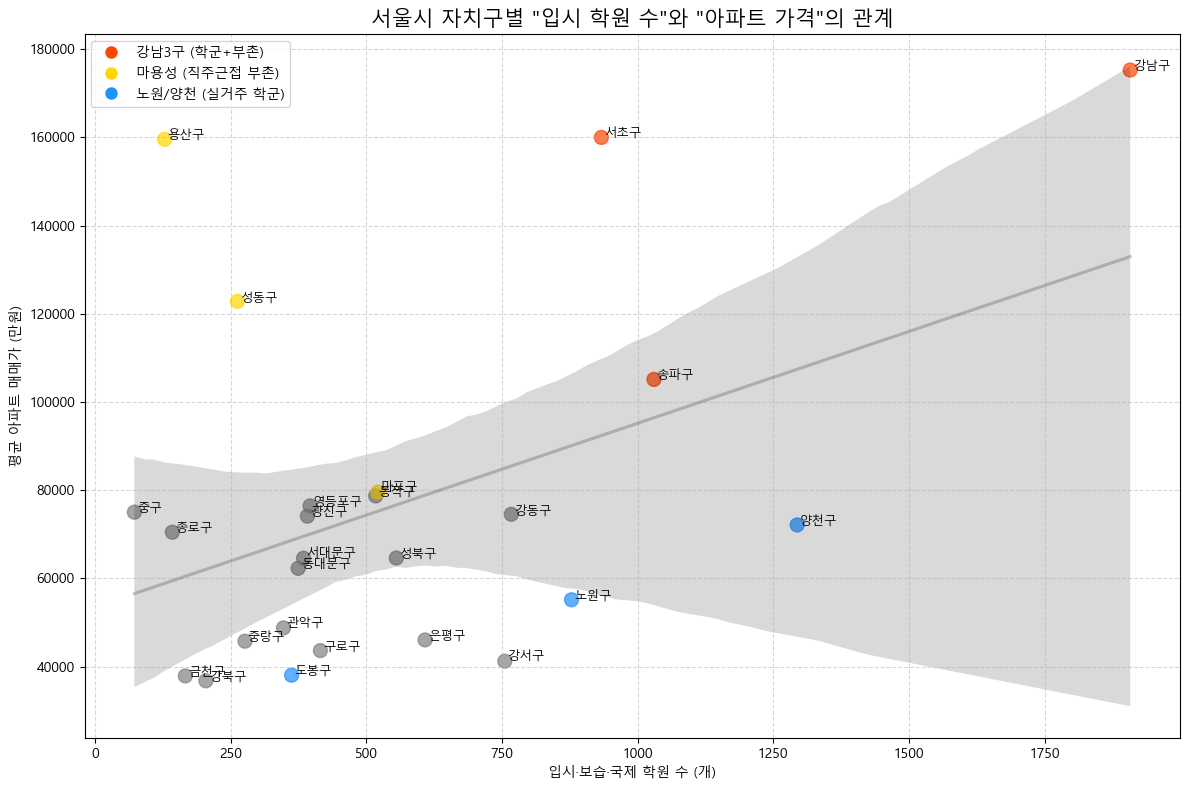

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# 1. 데이터 로드 및 전처리
df_academy = pd.read_csv('서울시 학원 교습소정보.csv', encoding='cp949')
df_price = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')

# 주소에서 자치구 추출
df_academy = df_academy.dropna(subset=['도로명주소'])
df_academy['자치구명'] = df_academy['도로명주소'].str.split(' ').str[1]
df_price['자치구명'] = df_price['자치구명'].astype(str)

# 2. "찐" 핵심 학원만 필터링 (보통교과, 진학지도, 국제 등)
# 단순 검색보다 카테고리 매칭이 정확합니다.
core_categories = ['보통교과', '외국어', '진학지도', '국제', '인문사회(중)']
df_academy['is_core'] = df_academy['교습계열명'].isin(core_categories)

# 자치구별 핵심 학원 수 집계
df_core_count = df_academy[df_academy['is_core']].groupby('자치구명').size().reset_index(name='핵심입시학원수')

# 자치구별 아파트 평균 거래가 집계
df_price_mean = df_price.groupby('자치구명')['물건금액(만원)'].mean().reset_index()
df_price_mean.columns = ['자치구명', '평균거래금액']

# 데이터 병합
merged_df = pd.merge(df_price_mean, df_core_count, on='자치구명').fillna(0)

# 3. 시각화 (지역 성격별 색상 구분)
plt.figure(figsize=(12, 8))

# 색상 설정 로직
colors = []
for gu in merged_df['자치구명']:
    if gu in ['강남구', '서초구', '송파구']:
        colors.append('#FF4500')  # 강남3구 (Red)
    elif gu in ['용산구', '성동구', '마포구']:
        colors.append('#FFD700')  # 마용성 (Gold)
    elif gu in ['노원구', '양천구', '도봉구']:
        colors.append('#1E90FF')  # 교육특구 (Blue)
    else:
        colors.append('gray')     # 기타

# 산점도 그리기
plt.scatter(merged_df['핵심입시학원수'], merged_df['평균거래금액'], c=colors, s=100, alpha=0.7)

# 자치구 이름 표시
for i, row in merged_df.iterrows():
    plt.text(row['핵심입시학원수']+5, row['평균거래금액'], row['자치구명'], fontsize=9)

# 회귀선 추가
sns.regplot(x='핵심입시학원수', y='평균거래금액', data=merged_df, scatter=False, color='black', line_kws={'alpha':0.2})

# 그래프 꾸미기
plt.title('서울시 자치구별 "입시 학원 수"와 "아파트 가격"의 관계', fontsize=15)
plt.xlabel('입시·보습·국제 학원 수 (개)')
plt.ylabel('평균 아파트 매매가 (만원)')
plt.grid(True, linestyle='--', alpha=0.5)

# 범례 추가
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='강남3구 (학군+부촌)', markerfacecolor='#FF4500', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='마용성 (직주근접 부촌)', markerfacecolor='#FFD700', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='노원/양천 (실거주 학군)', markerfacecolor='#1E90FF', markersize=10)
]
plt.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
#학업 성취도 vs 부동산 가격

pip install selenium pandas beautifulsoup4 webdriver-manager

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

# 페이지가 로딩이 다 될 때까지 최대 10초까지 기다리는 조건을 쓰기 위해 할당
wait = WebDriverWait(driver, 10)

driver.get("https://asil.kr/asil/sub/school_list.jsp")
# 크롤링한 데이터를 먼저 집어넣을 리스트 생성
data = []

# 크롤링할 테이블이 2개기 때문에 함수로 정의해서 함수를 두 번 실행할 예정
def crawl_table():
    rows = driver.find_elements(By.CSS_SELECTOR, "table tbody tr")

    for row in rows:
        tds = row.find_elements(By.TAG_NAME, "td")
        if len(tds) >= 5:
            data.append({
                "위치": tds[1].text.strip(),
                "학교명": tds[2].text.strip(),
                "평균": tds[4].text.strip()
            })

# 두 번째 셀렉트 박스에서 첫 번째 옵션을 선택
# 셀렉트 박스 선택
select_boxes = wait.until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, "sel_box1"))
)
# 두 번째 셀렉트 박스 선택 후 첫 번째 옵션 선택(시,군,구)
Select(select_boxes[1]).select_by_index(0)

# 로딩이 다 될때까지 기다리기
time.sleep(1)

# 앞서 정의한 함수 실행해서 데이터 가져오기
crawl_table()



select_boxes = wait.until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, "sel_box1"))
)
# 세 번째 셀렉트 박스에서 두 번째 옵션(고등학교)를 선택
Select(select_boxes[2]).select_by_index(1)

time.sleep(1)
crawl_table()

# 크롤링한 데이터를 데이터프레임으로 만들기
df = pd.DataFrame(data)

driver.quit()

In [ ]:
df

,위치,학교명,평균
0,광진구 중곡동,대원국제중학교,100.0%
1,강북구 미아동,영훈국제중학교,98.3%
2,강남구 수서동,대왕중학교,97.6%
3,광진구 광장동,광남중학교,97.6%
4,강남구 압구정1동,압구정중학교,97.6%
...,...,...,...
614,강동구 암사동,선사고등학교,48.7%
615,영등포구 신길동,영신고등학교,48.0%
616,양천구 신정동,신서고등학교,46.9%
617,구로구 궁동,서울공연예술고등학교,40.3%


In [ ]:
df.to_csv('seoul_school_stat.csv', encoding='utf-8-sig')

In [ ]:
df = pd.read_csv('seoul_school_stat.csv')


In [ ]:
df=pd.read_csv("C:/Users/User/seoul_school_stats_gusplit.csv")
len(df)
s= df["구"].value_counts()
s.sum
len(s)

619

<bound method Series.sum of 구
송파구     43
노원구     42
강남구     39
강서구     39
양천구     31
은평구     29
강동구     29
관악구     28
성북구     28
서초구     25
동대문구    23
구로구     23
중랑구     22
동작구     22
서대문구    21
도봉구     21
광진구     20
마포구     20
강북구     19
종로구     19
영등포구    19
용산구     16
성동구     15
중구      13
금천구     13
Name: count, dtype: int64>

25

In [ ]:
import pandas as pd

# 1. 파일 불러오기
df = pd.read_csv('seoul_school_stats_gusplit.csv')

# 2. '평균' 컬럼의 % 문자 제거 및 숫자 변환
df['평균_수치'] = df['평균'].str.replace('%', '').astype(float)

# 3. '구'별로 그룹화하여 평균 계산 (점수 높은 순 정렬)
gu_mean = df.groupby('구')['평균_수치'].mean().sort_values(ascending=False).reset_index()

# 4. 컬럼 이름 변경 및 소수점 정리
gu_mean.columns = ['구', '평균_점수']
gu_mean['평균_점수'] = gu_mean['평균_점수'].round(2)

# 결과 출력
print(gu_mean)

# 파일 저장
gu_mean.to_csv('seoul_gu_average_score.csv', index=False, encoding='utf-8-sig')

       구  평균_점수
0    강남구  88.97
1    서초구  87.15
2    종로구  80.76
3    송파구  80.64
4    노원구  80.14
5     중구  79.89
6    마포구  79.32
7    양천구  79.29
8   서대문구  78.00
9    동작구  77.92
10   용산구  77.61
11   광진구  77.39
12   성동구  76.18
13   도봉구  76.17
14  동대문구  75.96
15   성북구  75.86
16   강동구  75.71
17  영등포구  75.66
18   강서구  75.31
19   은평구  73.00
20   관악구  72.66
21   구로구  72.09
22   강북구  71.96
23   금천구  67.16
24   중랑구  67.11


In [ ]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#학업 성취도가 높은 학교가 모여있는 구를 지역을 지도에 표시
import pandas as pd
import folium
import json
import requests

# 1. 데이터 준비 (앞서 저장한 CSV 파일이 있다고 가정)
# 만약 파일이 없다면, 아래 주석을 풀고 직접 데이터를 정의해서 쓰셔도 됩니다.
df = pd.read_csv('seoul_gu_average_score.csv') 
# df 컬럼 확인: ['구', '평균_점수'] 형태여야 합니다.

# 2. 서울시 지도 데이터 (GeoJSON) 가져오기
# 서울시 구별 경계 데이터를 깃허브에서 바로 불러옵니다.
geo_json_url = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
response = requests.get(geo_json_url)
geo_data = response.json()

# 3. 기본 지도 생성 (서울 시청 중심으로 설정)
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 4. 단계구분도(Choropleth Map) 만들기
folium.Choropleth(
    geo_data=geo_data,                  # 지도 경계 데이터
    data=df,                            # 매핑할 데이터프레임
    columns=['구', '평균_점수'],          # [매핑할 키값(구 이름), 매핑할 수치(점수)]
    key_on='feature.properties.name',   # GeoJSON 내에서 구 이름을 찾을 경로
    fill_color='YlOrRd',                # 색상 팔레트 (노랑->주황->빨강)
    fill_opacity=0.7,                   # 면 투명도
    line_opacity=0.2,                   # 선 투명도
    legend_name='구별 평균 학업 성취도 (%)' # 범례 이름
).add_to(m)

# 5. 지도 저장 및 보기
m.save('seoul_school_map.html')
print("지도가 'seoul_school_map.html' 파일로 저장되었습니다.")
display(m)

지도가 'seoul_school_map.html' 파일로 저장되었습니다.


In [ ]:
#학업성취도 기준으로 표시한 지도 위에 서울 학교 주소 좌표를 표시
import pandas as pd
import folium
import json
import requests

# --- [1. 기존 코드: 데이터 준비 및 단계구분도 지도 생성] ---

# 1.1 데이터 준비 (csv 파일이 같은 폴더에 있어야 합니다)
try:
    df = pd.read_csv('seoul_gu_average_score.csv')
    # 만약 파일이 없어서 에러가 난다면, 테스트를 위해 아래 주석을 풀어 임시 데이터를 사용하세요.
    # data = {'구': ['강남구', '서초구', '송파구', '노원구', '양천구'], '평균_점수': [95, 92, 88, 85, 90]}
    # df = pd.DataFrame(data)
except FileNotFoundError:
    print("CSV 파일을 찾을 수 없습니다. 파일 경로를 확인하거나 임시 데이터를 사용하세요.")
    exit()

# 1.2 서울시 지도 데이터 (GeoJSON) 가져오기
geo_json_url = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
response = requests.get(geo_json_url)
geo_data = response.json()

# 1.3 기본 지도 생성 (서울 시청 중심)
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 1.4 단계구분도(Choropleth Map) 만들기
folium.Choropleth(
    geo_data=geo_data,
    data=df,
    columns=['구', '평균_점수'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='구별 평균 학업 성취도 (%)'
).add_to(m)


# --- [2. 추가된 코드: 대학교 위치 마커 표시] ---

# 2.1 서울 주요 20개 대학교 위치 데이터 (이름, 위도, 경도)
universities = [
    {"name": "서울대학교", "lat": 37.459882, "lon": 126.951905},
    {"name": "연세대학교", "lat": 37.565784, "lon": 126.938572},
    {"name": "고려대학교", "lat": 37.590799, "lon": 127.027787},
    {"name": "서강대학교", "lat": 37.550925, "lon": 126.941139},
    {"name": "성균관대학교", "lat": 37.588227, "lon": 126.993606},
    {"name": "한양대학교", "lat": 37.557232, "lon": 127.045322},
    {"name": "중앙대학교", "lat": 37.505088, "lon": 126.957101},
    {"name": "경희대학교", "lat": 37.596195, "lon": 127.052544},
    {"name": "한국외국어대학교", "lat": 37.597385, "lon": 127.058380},
    {"name": "서울시립대학교", "lat": 37.583866, "lon": 127.058777},
    {"name": "이화여자대학교", "lat": 37.561885, "lon": 126.946811},
    {"name": "건국대학교", "lat": 37.540762, "lon": 127.079343},
    {"name": "동국대학교", "lat": 37.558277, "lon": 127.000179},
    {"name": "홍익대학교", "lat": 37.551464, "lon": 126.925011},
    {"name": "숙명여자대학교", "lat": 37.546364, "lon": 126.964831},
    {"name": "국민대학교", "lat": 37.610643, "lon": 126.997282},
    {"name": "숭실대학교", "lat": 37.496311, "lon": 126.957460},
    {"name": "세종대학교", "lat": 37.550260, "lon": 127.073139},
    {"name": "광운대학교", "lat": 37.619496, "lon": 127.059696},
    {"name": "서울과학기술대학교", "lat": 37.631668, "lon": 127.077439}
]

# 2.2 반복문으로 지도 위에 동그라미 마커 추가
for uni in universities:
    folium.CircleMarker(
        location=[uni['lat'], uni['lon']], # 마커 위치
        radius=6,                          # 동그라미 크기
        color='blue',                      # 테두리 색상 (배경색과 대비되게 파랑)
        fill=True,
        fill_color='#00c4de',              # 내부 색상 (하늘색 계열)
        fill_opacity=1.0,                  # 내부 불투명도
        tooltip=uni['name'],               # 마우스 올렸을 때 학교 이름 표시
        popup=folium.Popup(uni['name'], max_width=200) # 클릭 시 팝업
    ).add_to(m) # 지도 m에 추가

# --- [3. 결과 출력] ---

# 3.1 지도 저장
m.save('seoul_school_and_uni_map.html')
print("지도가 'seoul_school_and_uni_map.html' 파일로 저장되었습니다.")

display(m)

지도가 'seoul_school_and_uni_map.html' 파일로 저장되었습니다.


C:\Users\User\AppData\Local\Temp\ipykernel_21320\336590720.py:19: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_df = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')


데이터 로딩 완료
분석된 상관계수: 0.75


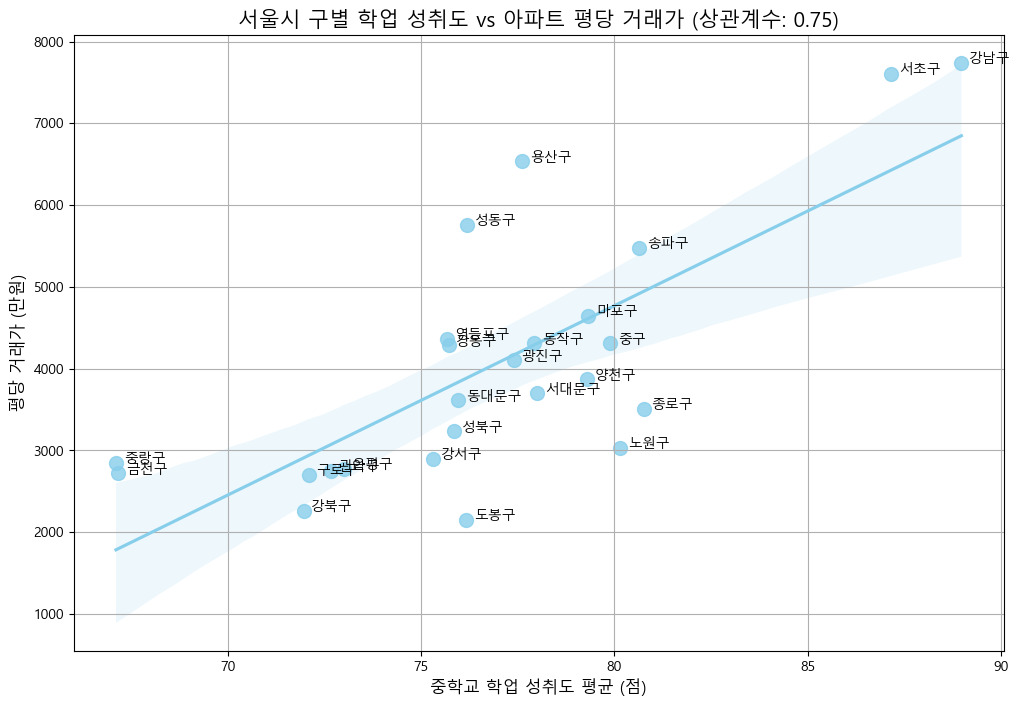

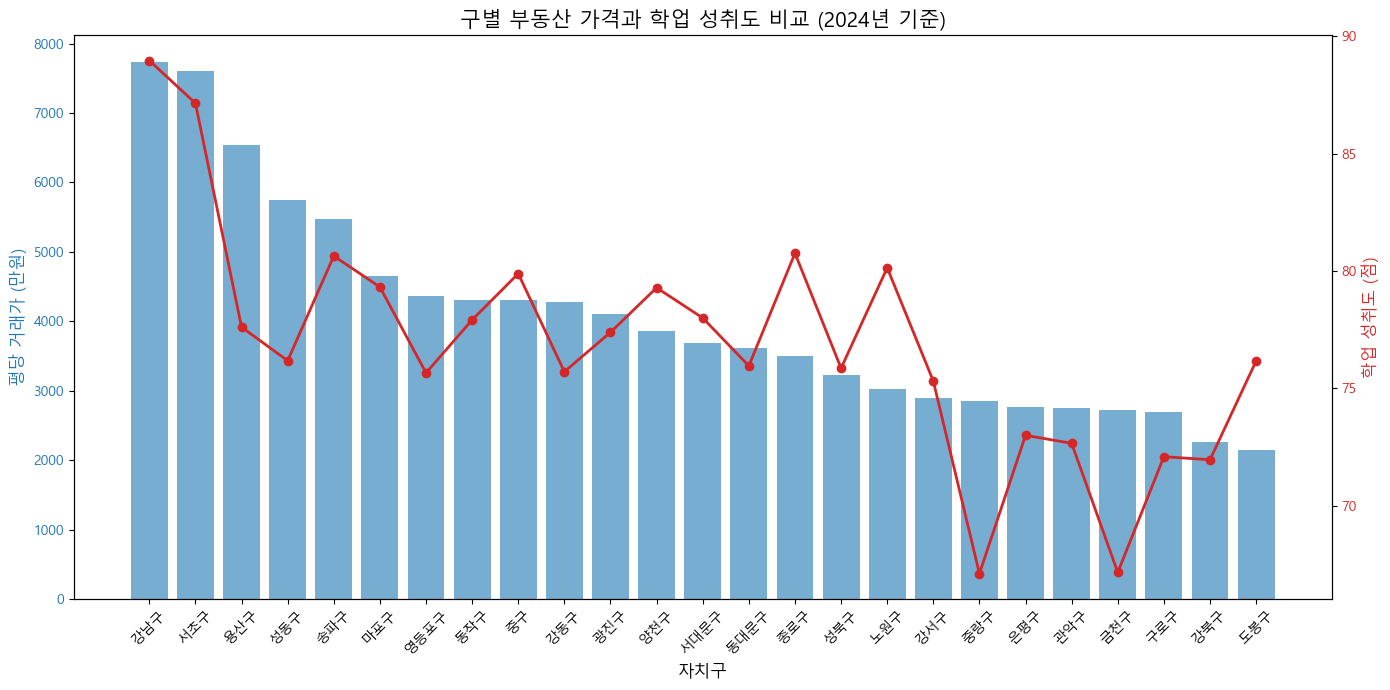

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 한글 폰트 설정
# Windows 사용자는 'Malgun Gothic', Mac 사용자는 'AppleGothic'으로 바꿔주세요.
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 불러오기
try:
    # 학업 성취도 데이터
    score_df = pd.read_csv('seoul_gu_average_score.csv')
    # 부동산 데이터 (인코딩 에러 발생 시 cp949 시도)
    try:
        real_estate_df = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='utf-8')
    except UnicodeDecodeError:
        real_estate_df = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')
        
    print("데이터 로딩 완료")
    
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 파일명과 경로를 확인해주세요.")

# 3. 부동산 데이터 전처리 (2024년 기준, 평당가 계산)
# 취소된 거래는 제외
valid_real_estate = real_estate_df[real_estate_df['취소일'].isnull()].copy()

# '계약일'(예: 20240101)에서 연도 추출
valid_real_estate['Year'] = valid_real_estate['계약일'] // 10000

# 2024년 데이터만 필터링 
df_2024 = valid_real_estate[valid_real_estate['Year'] == 2024].copy()

# 평당가 계산: (물건금액 / 건물면적) * 3.3
df_2024['Price_per_m2'] = df_2024['물건금액(만원)'] / df_2024['건물면적(㎡)']
df_2024['평당가(만원)'] = df_2024['Price_per_m2'] * 3.3

# 구별 평균 평당가 계산 ('자치구명' 컬럼 사용)
gu_price_mean = df_2024.groupby('자치구명')['평당가(만원)'].mean().reset_index()
gu_price_mean.columns = ['구', '평당가(만원)']

# 4. 데이터 병합 (학업성취도 + 부동산 가격)
merged_df = pd.merge(score_df, gu_price_mean, on='구')

# 상관계수 계산
correlation = merged_df['평균_점수'].corr(merged_df['평당가(만원)'])
print(f"분석된 상관계수: {correlation:.2f}")

# 5. 시각화 1: 산점도와 회귀선 (Scatter Plot)
plt.figure(figsize=(12, 8))
sns.regplot(x='평균_점수', y='평당가(만원)', data=merged_df, color='skyblue', scatter_kws={'s': 100})

# 구 이름 라벨 표시
for i in range(merged_df.shape[0]):
    plt.text(
        x=merged_df['평균_점수'][i] + 0.2, 
        y=merged_df['평당가(만원)'][i], 
        s=merged_df['구'][i], 
        fontsize=10
    )

plt.title(f'서울시 구별 학업 성취도 vs 아파트 평당 거래가 (상관계수: {correlation:.2f})', fontsize=15)
plt.xlabel('중학교 학업 성취도 평균 (점)', fontsize=12)
plt.ylabel('평당 거래가 (만원)', fontsize=12)
plt.grid(True)
plt.show()

# 6. 시각화 2: 이중 축 그래프 (Dual Axis)
# 평당가 높은 순으로 정렬
merged_df_sorted = merged_df.sort_values(by='평당가(만원)', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 7))

# 왼쪽 축: 부동산 가격 (막대 그래프)
color_bar = 'tab:blue'
ax1.set_xlabel('자치구', fontsize=12)
ax1.set_ylabel('평당 거래가 (만원)', color=color_bar, fontsize=12)
ax1.bar(merged_df_sorted['구'], merged_df_sorted['평당가(만원)'], color=color_bar, alpha=0.6, label='평당가')
ax1.tick_params(axis='y', labelcolor=color_bar)
plt.xticks(rotation=45)

# 오른쪽 축: 학업 성취도 (꺾은선 그래프)
ax2 = ax1.twinx()
color_line = 'tab:red'
ax2.set_ylabel('학업 성취도 (점)', color=color_line, fontsize=12)
ax2.plot(merged_df_sorted['구'], merged_df_sorted['평균_점수'], color=color_line, marker='o', linewidth=2, label='학업 성취도')
ax2.tick_params(axis='y', labelcolor=color_line)

plt.title('구별 부동산 가격과 학업 성취도 비교 (2024년 기준)', fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
''' 학교 수나 학원 수와 비교하면 상관관계가 0.75로 비약적으로 높아짐. 부동산 시장이 단순한 학교수나 학원수보다 실제 성적(질)에 훨씬 더 민감하게 반응한다는 사실을 증명한다.
학업 성취도와 아파트 평당가의 상관계수는 0.75로 통계적으로 매우 강한 양의 상관관계를 보인다. 시장은 단순히 학원 간판이 많은 동네보다, 실제로 공부 잘하는 친구들이 모여 있는 면학 분위기에 더 높은 가치를 부여하고 있다. 
학업 성취도가 높다는 것은 그 지역 학생들의 수준과 부모들의 교육열이 높다는 뜻이며 학부모들은 이러한 우수한 면학 분위기를 사기 위해 기꺼이 더 비싼 주거 비용을 지불한다. 
따라서 단순히 학원가 지도를 보는 것보다, 중학교 학업 성취도, 특목고 진학률을 확인하는 것이 집값 상승 여력을 판단하는 더 정확한 지표이다.집값은 아직 낮지만 학업 성취도가 급상승하고 있는 지역이 미래가치가 있다는 결론을 낼 수 있다. '''